<a href="https://colab.research.google.com/github/danterocha/danterocha/blob/main/CTP2_atividade_06_%5BDante%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"> CTP2 - Atividade Prática 06 </div>

# <div align="center"> ***Dante Rocha Lomonaco - Dezembro / 2021*** </div>

<a><img src="http://3.bp.blogspot.com/-KoTwHy9k-_c/U34Hpu5AQII/AAAAAAAAx1w/dE7Tu1QDU-8/s1600/como+uma+onda.gif" 
alt="Waves" width="1500" height="300" border="5" /></a>


Professor: Leonardo Miquelutti

# Atividade 6

# Parte 1 - visualização de dados sísmicos com `pyvista`

Neste exercício, você deve visualizar um dado sísmico usando o `pyvista`.

O dado é o [volve10r12-full-twt-sub3d.sgy](https://github.com/trhallam/segysak-t21-tutorial/blob/main/data/volve10r12-full-twt-sub3d.sgy?raw=true), utilizado na Aula 11.

Caso deseje realizar esta tarefa no Google Colab, é necessário executar a célula abaixo para instalar os pacotes e baixar os dados. Do contrário, não.

In [1]:
# COLAB ONLY
!pip install segysak
!pip install gitpython
!pip install mayavi

!pip install -q piglet pyvirtualdisplay
!pip install -q pyvista
!apt-get -qq install xvfb
!apt-get install libgl1-mesa-dev

from pyvirtualdisplay import Display
display = Display(visible=0, size=(600, 400))
display.start()

     |████████████████████████████████| 307 kB 14.3 MB/s 
     |████████████████████████████████| 83 kB 981 kB/s 
     |████████████████████████████████| 180 kB 16.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 7.1 MB 8.5 MB/s 
     |████████████████████████████████| 177 kB 51.3 MB/s 
     |████████████████████████████████| 194 kB 55.1 MB/s 
     |████████████████████████████████| 6.1 MB 55.8 MB/s 
     |████████████████████████████████| 5.1 MB 43.4 MB/s 
     |████████████████████████████████| 6.7 MB 45.5 MB/s 
     |████████████████████████████████| 88.3 MB 114 kB/s 
     |████████████████████████████████| 1.1 MB 56.9 MB/s 
     |████████████████████████████████| 192 kB 58.9 MB/s 
     |████████████████████████████████| 271 kB 46.1 MB/s 
     |████████████████████████████████| 160 kB 59.5 MB/s 
  ERROR: Failed building wheel for mayavi
  Running setup.py clean for mayavi
  Created wheel for pyface: filename=pyface-7.3.0-py3-non

In [2]:
# download the data
import git
git.Git("/content").clone("git://github.com/trhallam/segysak-t21-tutorial.git")

''

Faça as importações

In [3]:
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from segysak.segy import segy_loader
from mayavi import mlab

/usr/local/lib/python3.7/dist-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/usr/local/lib/python3.7/dist-packages/traits/etsconfig/etsconfig.py:412: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


Verifique se o dado SEG-Y existe.

In [4]:
# specify the example file and check we have the example data
segy_file = pathlib.Path("segysak-t21-tutorial/data/volve10r12-full-twt-sub3d.sgy")
print("SEG-Y exists:", segy_file.exists())


SEG-Y exists: True


In [5]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead

In [6]:
# examine the text header
get_segy_texthead(segy_file)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [7]:
# scan the headers to check
scan = segy_header_scan(segy_file, max_traces_scan=2000)
scan

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,100.590,57.896096,1.0,50.75,100.5,150.25,202.0
TRACE_SEQUENCE_FILE,5,2000.0,10094.455,2.851673,10090.0,10092.00,10094.0,10097.00,10099.0
FieldRecord,9,2000.0,10094.455,2.851673,10090.0,10092.00,10094.0,10097.00,10099.0
TraceNumber,13,2000.0,100.590,57.896096,1.0,50.75,100.5,150.25,202.0
EnergySourcePoint,17,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [8]:
# display scan
with pd.option_context("display.max_rows", 100):
  display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,1.005900e+02,57.896096,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,2000.0,1.009445e+04,2.851673,10090.0,1.009200e+04,10094.0,1.009700e+04,10099.0
FieldRecord,9,2000.0,1.009445e+04,2.851673,10090.0,1.009200e+04,10094.0,1.009700e+04,10099.0
TraceNumber,13,2000.0,1.005900e+02,57.896096,1.0,5.075000e+01,100.5,1.502500e+02,202.0
EnergySourcePoint,17,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
CDP,21,2000.0,2.249590e+03,57.896096,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
CDP_TRACE,25,2000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
NSummedTraces,31,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
NStackedTraces,33,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0


Leia o dado sísmico.

In [9]:
# loading with default byte locations
seisnc_vol = segy_loader(segy_file)
seisnc_vol

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) uint16 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float64 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float64 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.595060190682801, -6.114936243337226, -1.50399996...
    coord_scalar:        -100.0

In [10]:
print(seisnc_vol.data.shape)

(61, 202, 850)


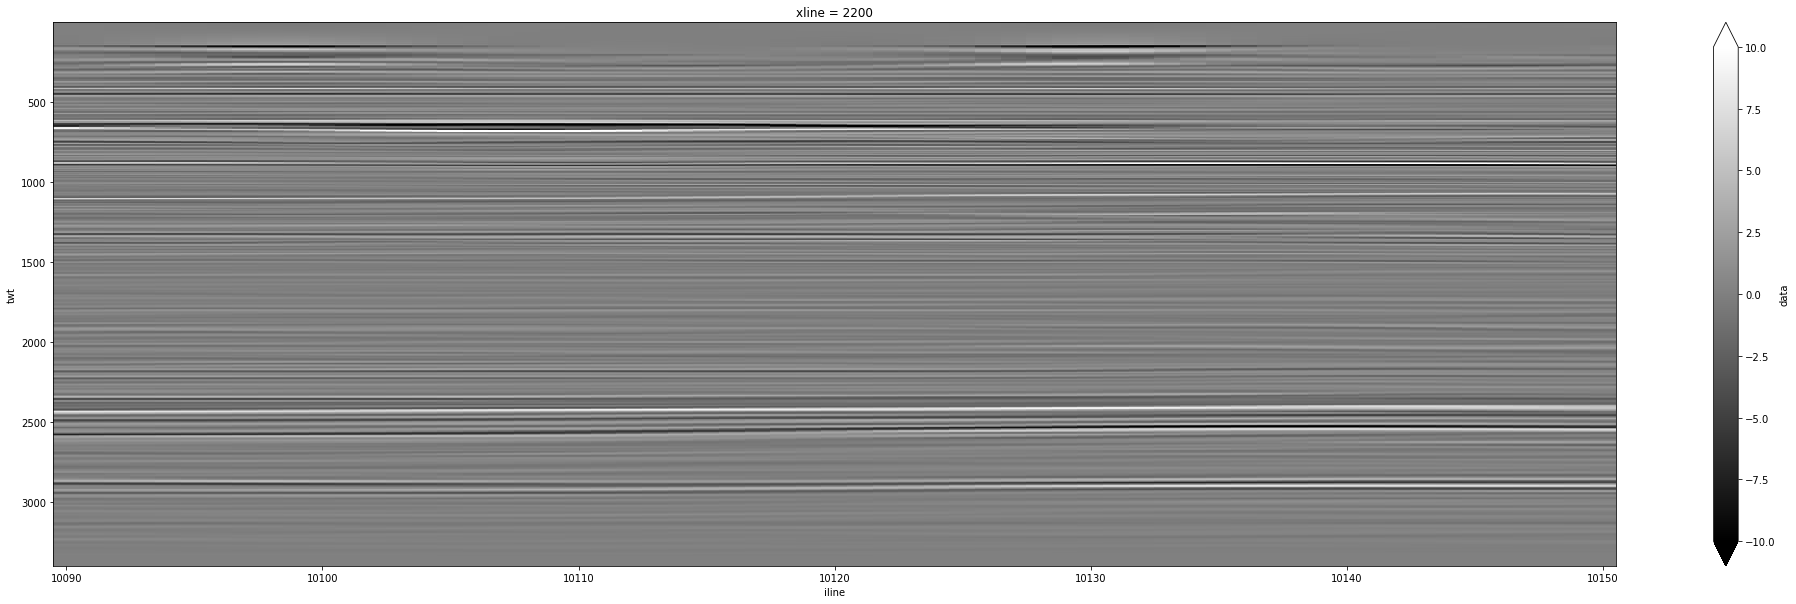

In [11]:
# lets quickly checkout our data
cmap='binary_r'
data_qc = seisnc_vol.sel(xline=2200).data.T.plot(yincrease = False,
                                            figsize = (35,10),
                                            cmap=cmap,
                                            vmax = 10,)

Caso esteja no Google Colab, é necessário executar a célula abaixo. Senão, pule para a `import pyvista as pv`.

In [12]:
import pyvista as pv

A célula abaixo mostra um exemplo de como se cria um `StructuredGrid` com as coordenadas de cada ponto.

In [13]:
# pyvista example on StructuredGrid
xrng = np.arange(-10, 10, 2)
yrng = np.arange(-10, 0, 2)
zrng = np.arange(-10, 20, 2)
x, y, z = np.meshgrid(xrng, yrng, zrng)
grid = pv.StructuredGrid(x, y, z)
grid.points

/usr/local/lib/python3.7/dist-packages/pyvista/utilities/helpers.py:477: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


pyvista_ndarray([[-10., -10., -10.],
                 [-10.,  -8., -10.],
                 [-10.,  -6., -10.],
                 ...,
                 [  8.,  -6.,  18.],
                 [  8.,  -4.,  18.],
                 [  8.,  -2.,  18.]], dtype=float32)

In [14]:
grid

StructuredGrid,Information
N Cells,504
N Points,750
X Bounds,"-1.000e+01, 8.000e+00"
Y Bounds,"-1.000e+01, -2.000e+00"
Z Bounds,"-1.000e+01, 1.800e+01"
Dimensions,"5, 10, 15"
N Arrays,0


Use o exemplo acima para criar as coordenadas do cubo sísmico que iniciarão um `StructuredGrid`. Atente-se aos sinais das coordenadas.

In [15]:
print(np.amin(seisnc_vol['iline']), np.amax(seisnc_vol['iline']))
print(np.amin(seisnc_vol['xline']), np.amax(seisnc_vol['xline']))
print(np.amin(seisnc_vol['twt']), np.amax(seisnc_vol['twt']))

<xarray.DataArray 'iline' ()>
array(10090, dtype=uint16) <xarray.DataArray 'iline' ()>
array(10150, dtype=uint16)
<xarray.DataArray 'xline' ()>
array(2150, dtype=uint16) <xarray.DataArray 'xline' ()>
array(2351, dtype=uint16)
<xarray.DataArray 'twt' ()>
array(4.) <xarray.DataArray 'twt' ()>
array(3400.)


Agora, crie o `StructuredGrid`. Use o atributo `points` para verificar se foram criadas corretamente. 

Se o tipo do parâmetro passado para a criação do `StructuredGrid` for `uint16`, o tipo de `StructuredGrid.points` será `uint16`, o que significa _inteiro sem sinal de 16 bits_. O que isso significa? Que esse tipo pode bugar valores negativos que porventura você tenha nas coordenadas. 

O método [`astype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) pode solucionar esse eventual problema.

In [16]:
# create StructuredGrid
xrng = np.arange(2150, 2352, 1)
yrng = np.arange(10090, 10151, 1)
zrng = np.arange(4, 3404, 4)
x, y, z = np.meshgrid(xrng, yrng, zrng)
grid = pv.StructuredGrid(x, y, z)

/usr/local/lib/python3.7/dist-packages/pyvista/utilities/helpers.py:477: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [17]:
grid.points

pyvista_ndarray([[2.1500e+03, 1.0090e+04, 4.0000e+00],
                 [2.1500e+03, 1.0091e+04, 4.0000e+00],
                 [2.1500e+03, 1.0092e+04, 4.0000e+00],
                 ...,
                 [2.3510e+03, 1.0148e+04, 3.4000e+03],
                 [2.3510e+03, 1.0149e+04, 3.4000e+03],
                 [2.3510e+03, 1.0150e+04, 3.4000e+03]], dtype=float32)

In [18]:
grid.flip_z()

/usr/local/lib/python3.7/dist-packages/pyvista/core/pointset.py:288: PyvistaDeprecationWarning: You did not specify a value for `inplace` and the default value will be changing to `False` in future versions for point-based meshes (e.g., `PolyData`). Please make sure you are not assuming this to be an inplace operation.
  warnings.warn(DEFAULT_INPLACE_WARNING, PyvistaDeprecationWarning)


StructuredGrid,Information
N Cells,10238940
N Points,10473700
X Bounds,"2.150e+03, 2.351e+03"
Y Bounds,"1.009e+04, 1.015e+04"
Z Bounds,"4.000e+00, 3.400e+03"
Dimensions,"61, 202, 850"
N Arrays,0


In [19]:
# check mesh points
grid.bounds

(2150.0, 2351.0, 10090.0, 10150.0, 4.0, 3400.0)

In [20]:
seisnc_vol

<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) uint16 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float64 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float64 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.595060190682801, -6.114936243337226, -1.50399996...
    coord_scalar:        -100.0

In [21]:
type(seisnc_vol), type(grid)

(xarray.core.dataset.Dataset, pyvista.core.pointset.StructuredGrid)

Adicione os dados de amplitude do cubo sísmico.

In [22]:
# add amplitude data
grid['Amplitudes'] = seisnc_vol.data.values.flatten(order = 'F')

Crie fatias (_slices_) para:
* iline = 10100
* xline = 2200
* z = 2000 metros  

de modo que todas possam ser mostradas juntas. 

In [23]:
# create slices
slices = grid.slice_orthogonal(x = 2200,
                              y = 10100,
                              z = 2000) 

Crie o plot final. A figura abaixo mostra como deve ser seu resultado.

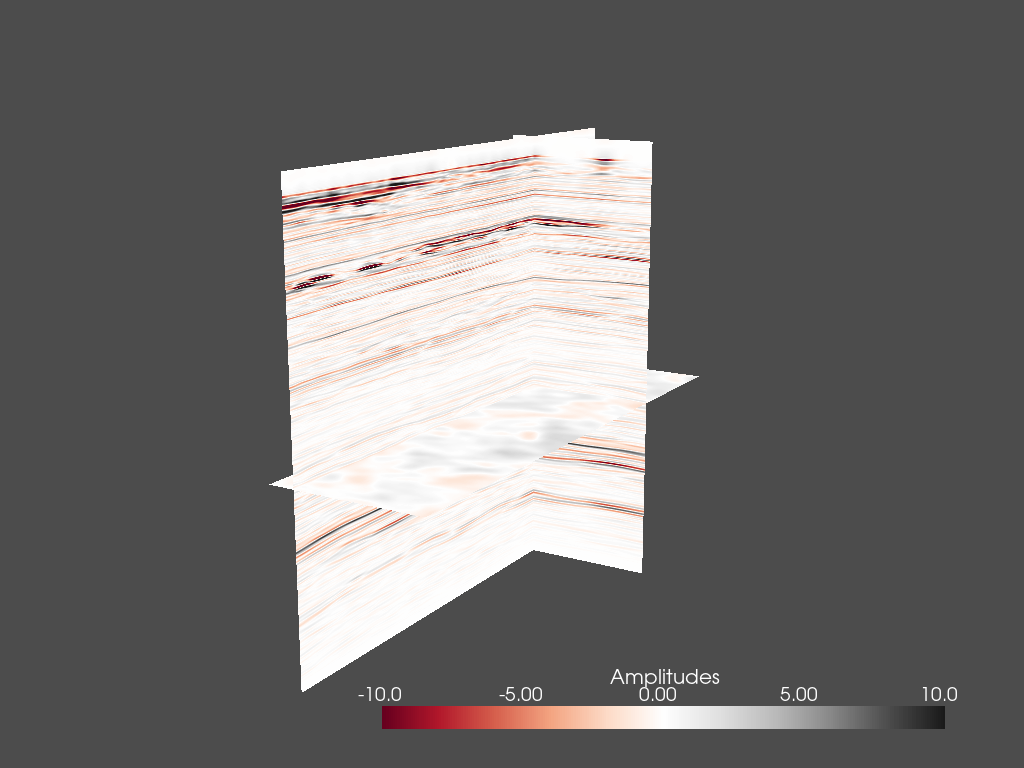

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


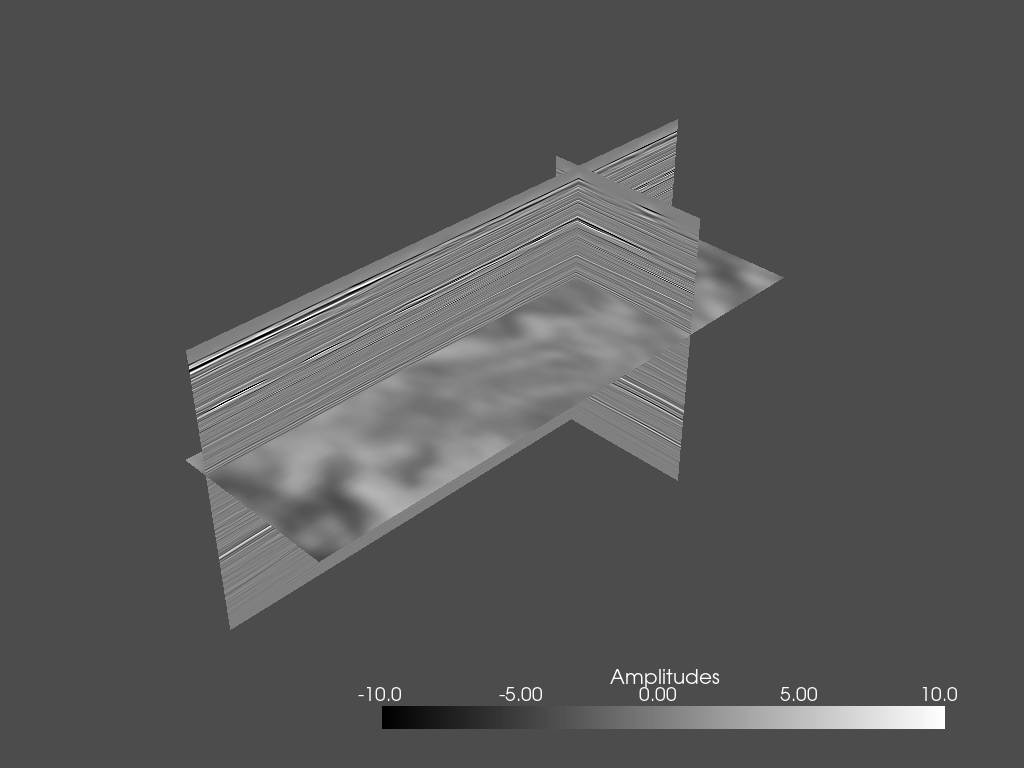

In [24]:
# crie o plot
cmap='binary_r'
p = pv.Plotter(lighting='none', notebook = True)
p.add_mesh(slices, cmap=cmap, clim=[-10,10])
p.set_scale(zscale=0.03)

p.show()

# Parte 2

Nessa parte, você deverá calcular o perfil do Coeficiente de Refletividade para o poço `KK1.las` (baixado automaticamente na execução da próxima célula, e que também pode ser encontrado [aqui](https://raw.githubusercontent.com/mardani72/Synthetic_Seismogram/master/KK1.las)).

In [25]:
# download the data
git.Git("/content").clone("https://github.com/mardani72/Synthetic_Seismogram.git")

''

A célula abaixo instala os pacotes necessários.

In [26]:
!pip install welly
!pip install lasio
!pip install wellpathpy
!pip install plotly_express

     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 77 kB 6.6 MB/s 
  Created wheel for welly: filename=welly-0.4.10-py3-none-any.whl size=56038 sha256=1bb8ce0132c0360c28fb0c9f72faac60377114183813f4c6dee5fdfdc70dbeb4
  Stored in directory: /root/.cache/pip/wheels/e6/cf/9f/7d1cc15079dbecf27bb332a36574907bf3c394371774c4ab49
  Created wheel for striplog: filename=striplog-0.8.8-py3-none-any.whl size=83653 sha256=9d045266c5500b624e98b3f0b7c9da5631a136edf1f55898c0ce1d62f9dfd04d
  Stored in directory: /root/.cache/pip/wheels/c9/c1/35/ca8f6fc79aafef514edc14a8f4546efbcf92a943b9e7943810
Successfully built welly striplog


Após calcular o perfil do Coeficiente de Reflexão, faça um plot conforme o modelo abaixo, que mostra `profundidade vs RC` colorido pelos valores de porosidade (PHIE).

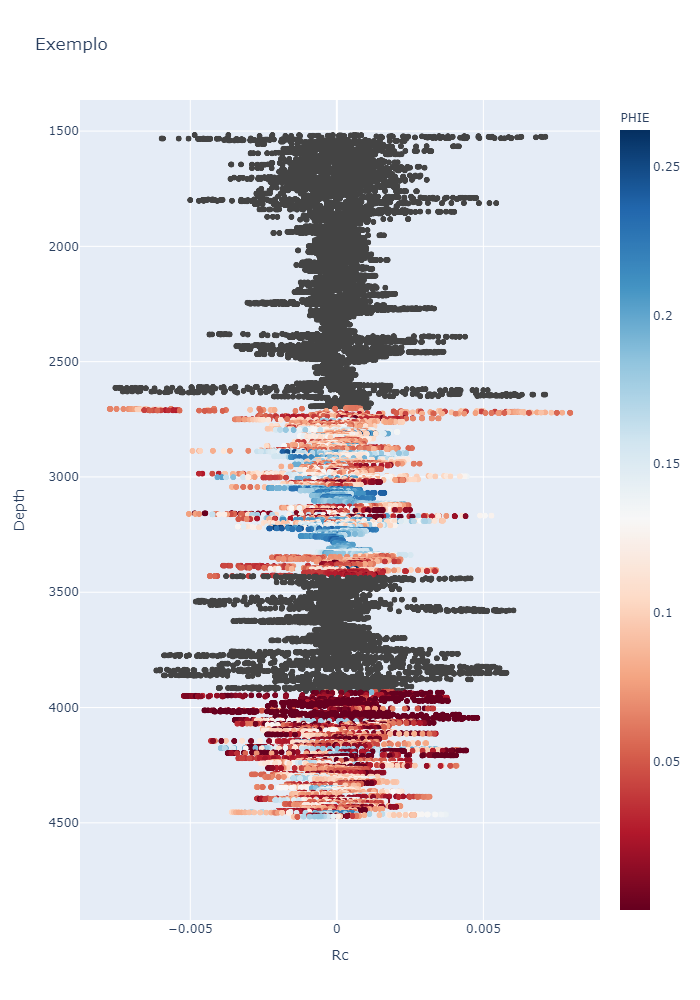

A seguir, um roteiro **SUGERIDO** para a solução.

In [27]:
import welly
from welly import Well
import pandas as pd
import lasio
import plotly_express as px

In [28]:
# read data
w_path = 'https://raw.githubusercontent.com/mardani72/Synthetic_Seismogram/master/KK1.las'
w = Well.from_las(w_path)
w_las = lasio.read(w_path)
w_las.header

/usr/local/lib/python3.7/dist-packages/welly/curve.py:216: UserWarning:

Irregular sampling in depth is not supported. Interpolating to regular basis.



{'Curves': [CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(19405,)),
  CurveItem(mnemonic="DT", unit="us/ft", value="", descr="DT", original_mnemonic="DT", data.shape=(19405,)),
  CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(19405,)),
  CurveItem(mnemonic="SW", unit="m3/m3", value="", descr="SW", original_mnemonic="SW", data.shape=(19405,)),
  CurveItem(mnemonic="PHIE", unit="m3/m3", value="", descr="PHIE", original_mnemonic="PHIE", data.shape=(19405,))],
 'Other': '',
 'Parameter': [],
 'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="SINGLE LINE PER DEPTH "),
  HeaderItem(mnemonic="CREA", unit="", value="8/24/2012 12:51", descr="22")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="1517.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="3850.70

In [29]:
# convert DT to µs/m and RHOB to kg/m3
w.data['DT'] = w.data['DT']/0.3048
w.data['RHOB'] = w.data['RHOB']*1000

In [30]:
# Sonic Despiking
dt = w.data['DT']
w.data['DT_DS'] = dt.despike(window_length = 50, z=2)

In [31]:
# Density Despiking
den = w.data['RHOB']
w.data['RHOB_DS'] =den.despike(window_length = 50, z=2)

In [32]:
# Sonic Smoothing
dt_ds = w.data['DT_DS']
w.data['DT_DS_SM'] = dt_ds.smooth(window_length = 10,
                                  samples = False)

In [33]:
# Density Smoothing
den_ds = w.data['RHOB_DS']
w.data['RHOB_DS_SM'] = den_ds.smooth(window_length = 10,
                                  samples = False)

In [34]:
# define log_start and kb depths
log_start = 1517.0                 # Depth of logging starts(m) from header
kb = 15.0                          # Kelly Bushing elevation(m) from header

In [35]:
# solve the gap interval issue
# define the gap interval in m
gap_int = log_start - kb

# define the gap velocity
repl_vel = 2632                # this is from VSP data knowledge (m/s)

# calculate the TWT for the gap
log_start_time = 2*gap_int /repl_vel  # 2 for twt
log_start_time

1.141337386018237

In [36]:
# replace NaN values with zero and convert DT to seconds to each interval
dt_iterval = np.nan_to_num(dt) * 0.1524 /1e6

In [37]:
# calculate TWT
t_cum = np.cumsum(dt_iterval) * 2
w.data['TWT'] = t_cum +log_start_time
w.data['TWT']

Curve([1.14139407, 1.14145058, 1.14150739, ..., 2.5065488 , 2.50660983,
       2.50666867])

In [38]:
# transform data to dataframe
df = w.df()
df.head()

,DT,RHOB,SW,PHIE,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT
Depth,,,,,,,,,
1517.0000,185.978669,1334.599972,NaN,NaN,185.978669,1334.599972,231.538315,1642.518456,1.141394
1517.1524,185.389769,1233.000040,NaN,NaN,185.389769,1233.000040,235.005109,1651.015497,1.141451
1517.3048,186.378286,1190.000057,NaN,NaN,186.378286,1190.000057,238.492810,1663.155496,1.141507
1517.4572,194.571525,1218.099952,NaN,NaN,194.571525,1218.099952,241.991691,1680.152419,1.141567
1517.6096,179.794291,1386.100054,NaN,NaN,179.794291,1386.100054,245.149686,1697.703188,1.141621


In [39]:
# calculate sonic velocity
df['SonicVel'] = 1e6 / df.DT_DS_SM

In [40]:
# calculate AI
df['AI'] = df['SonicVel'] * df['RHOB_DS_SM']
df

,DT,RHOB,SW,PHIE,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT,SonicVel,AI
Depth,,,,,,,,,,,
1517.0000,185.978669,1334.599972,NaN,NaN,185.978669,1334.599972,231.538315,1642.518456,1.141394,4318.939620,7.093938e+06
1517.1524,185.389769,1233.000040,NaN,NaN,185.389769,1233.000040,235.005109,1651.015497,1.141451,4255.226643,7.025445e+06
1517.3048,186.378286,1190.000057,NaN,NaN,186.378286,1190.000057,238.492810,1663.155496,1.141507,4192.998531,6.973609e+06
1517.4572,194.571525,1218.099952,NaN,NaN,194.571525,1218.099952,241.991691,1680.152419,1.141567,4132.373295,6.943017e+06
1517.6096,179.794291,1386.100054,NaN,NaN,179.794291,1386.100054,245.149686,1697.703188,1.141621,4079.140449,6.925170e+06
...,...,...,...,...,...,...,...,...,...,...,...
4473.4076,214.616145,2506.000042,1.0,0.1446,214.616145,2506.000042,191.324216,2620.296911,2.506421,5226.729911,1.369558e+07
4473.5600,211.386493,2539.299965,1.0,0.1224,211.386493,2539.299965,191.744885,2618.433835,2.506486,5215.262987,1.365582e+07
4473.7124,206.549875,2579.699993,1.0,0.0942,206.549875,2579.699993,192.192699,2616.635374,2.506549,5203.111280,1.361465e+07


In [41]:
# calculate RC
Imp = df['AI'].values

# now the Rc
Rc = []
for i in range(len(Imp)-1):
  z = (Imp[i+1] - Imp[i]) / (Imp[i+1] + Imp[i])
  Rc.append(z)

# to adjust vector size copy the last element to the tail
Rc.append(Rc[-1])

In [42]:
# add RC into dataframe as new column
df['Rc'] = pd.Series(Rc, index = df.index)
df

,DT,RHOB,SW,PHIE,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT,SonicVel,AI,Rc
Depth,,,,,,,,,,,,
1517.0000,185.978669,1334.599972,NaN,NaN,185.978669,1334.599972,231.538315,1642.518456,1.141394,4318.939620,7.093938e+06,-0.004851
1517.1524,185.389769,1233.000040,NaN,NaN,185.389769,1233.000040,235.005109,1651.015497,1.141451,4255.226643,7.025445e+06,-0.003703
1517.3048,186.378286,1190.000057,NaN,NaN,186.378286,1190.000057,238.492810,1663.155496,1.141507,4192.998531,6.973609e+06,-0.002198
1517.4572,194.571525,1218.099952,NaN,NaN,194.571525,1218.099952,241.991691,1680.152419,1.141567,4132.373295,6.943017e+06,-0.001287
1517.6096,179.794291,1386.100054,NaN,NaN,179.794291,1386.100054,245.149686,1697.703188,1.141621,4079.140449,6.925170e+06,-0.000138
...,...,...,...,...,...,...,...,...,...,...,...,...
4473.4076,214.616145,2506.000042,1.0,0.1446,214.616145,2506.000042,191.324216,2620.296911,2.506421,5226.729911,1.369558e+07,-0.001454
4473.5600,211.386493,2539.299965,1.0,0.1224,211.386493,2539.299965,191.744885,2618.433835,2.506486,5215.262987,1.365582e+07,-0.001510
4473.7124,206.549875,2579.699993,1.0,0.0942,206.549875,2579.699993,192.192699,2616.635374,2.506549,5203.111280,1.361465e+07,-0.001469


In [43]:
# Adjust dataframe to make a plot
df['DEPTH']=df.index
df['PHIE_nan']=df['PHIE'].fillna(-999)
df['NAN']=np.isnan(df.PHIE)
df

,DT,RHOB,SW,PHIE,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT,SonicVel,AI,Rc,DEPTH,PHIE_nan,NAN
Depth,,,,,,,,,,,,,,,
1517.0000,185.978669,1334.599972,NaN,NaN,185.978669,1334.599972,231.538315,1642.518456,1.141394,4318.939620,7.093938e+06,-0.004851,1517.0000,-999.0000,True
1517.1524,185.389769,1233.000040,NaN,NaN,185.389769,1233.000040,235.005109,1651.015497,1.141451,4255.226643,7.025445e+06,-0.003703,1517.1524,-999.0000,True
1517.3048,186.378286,1190.000057,NaN,NaN,186.378286,1190.000057,238.492810,1663.155496,1.141507,4192.998531,6.973609e+06,-0.002198,1517.3048,-999.0000,True
1517.4572,194.571525,1218.099952,NaN,NaN,194.571525,1218.099952,241.991691,1680.152419,1.141567,4132.373295,6.943017e+06,-0.001287,1517.4572,-999.0000,True
1517.6096,179.794291,1386.100054,NaN,NaN,179.794291,1386.100054,245.149686,1697.703188,1.141621,4079.140449,6.925170e+06,-0.000138,1517.6096,-999.0000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473.4076,214.616145,2506.000042,1.0,0.1446,214.616145,2506.000042,191.324216,2620.296911,2.506421,5226.729911,1.369558e+07,-0.001454,4473.4076,0.1446,False
4473.5600,211.386493,2539.299965,1.0,0.1224,211.386493,2539.299965,191.744885,2618.433835,2.506486,5215.262987,1.365582e+07,-0.001510,4473.5600,0.1224,False
4473.7124,206.549875,2579.699993,1.0,0.0942,206.549875,2579.699993,192.192699,2616.635374,2.506549,5203.111280,1.361465e+07,-0.001469,4473.7124,0.0942,False


No handles with labels found to put in legend.


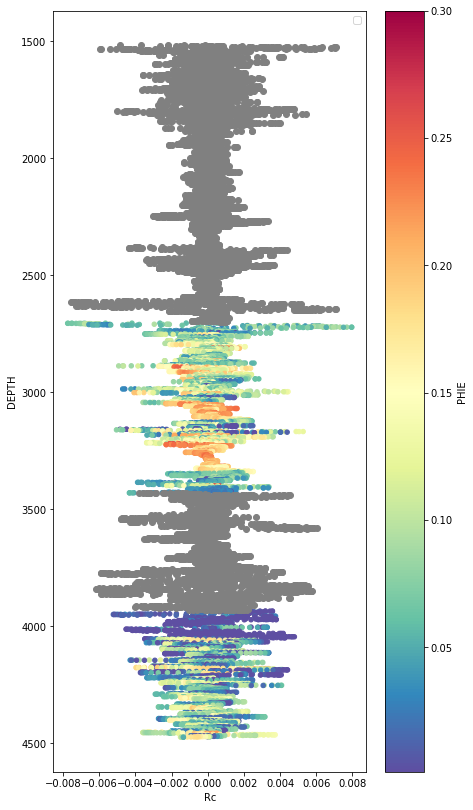

In [44]:
# make plot 
mask = np.isnan(df.PHIE)
fig, ax = plt.subplots(sharey=True, figsize = (7,14))
df.plot(kind='scatter', x='Rc', y='DEPTH', ax=ax, c='PHIE',cmap='Spectral_r', vmin=0.001, vmax=0.3)
o = ax.plot(df.Rc[mask], df.DEPTH[mask], color='gray', marker='o', linestyle='')
ax.set_axisbelow(True)
ax.invert_yaxis()
ax.legend()